<a href="https://colab.research.google.com/github/Knightmare519/komuter-ml-analysis/blob/main/Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KTM Komuter Feature Engineering**

This notebook focuses on feature engineering for our KomuterPulse project, which aims to develop a real-time transit intelligence platform for KTM Komuter operations. We'll analyze the features created during preprocessing, select the most relevant ones, and potentially create new features to improve our models.


We're using Prophet, a forecasting model developed by Facebook (now Meta), to predict future ridership. It’s especially good at handling:

- Seasonal patterns (like weekdays vs weekends)

- Holidays and events

- Trends and changes over time

## **Installation**

Prophet isn't part of standard Python, so we need to install it first.
The cell below will install Prophet and its dependencies. If you encounter errors, you may need to run this installation cell first.

In [10]:
# Install Prophet - run this cell if Prophet is not already installed
# Note: This may take several minutes to complete
%pip install prophet
try:
    import prophet
    print("Prophet is already installed!")
except ImportError:
    print("Installing Prophet...")
    # Use pip to install Prophet
    import sys
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'prophet'])
    print("Prophet installed successfully!")

Prophet is already installed!


## **Import Python Libraries**

- pandas helps you load and manipulate tables (like your CSV file).

- Prophet is the main model we use.

- matplotlib.pyplot is used to create graphs of your predictions.



In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


## **Load Your CSV Data**
- This reads your file into memory as a DataFrame (like a big Excel table).

- df.head() shows the first 5 rows so you can make sure the data loaded properly.

- Your file has many columns, but Prophet only needs:

- A timestamp (when the data was recorded)

- A value to forecast (like total ridership)

In [12]:
# Load your dataset from the local data/processed folder
from pathlib import Path

data_path = Path('../data/processed/komuter_processed.csv')
df = pd.read_csv(data_path)

# Check a few rows to understand the structure
df.head()


route        date  hour  total_ridership  \
0  Abdullah Hukum → Abdullah Hukum  2025-01-03    22                2   
1  Abdullah Hukum → Abdullah Hukum  2025-01-05    14                1   
2  Abdullah Hukum → Abdullah Hukum  2025-01-06    19                2   
3  Abdullah Hukum → Abdullah Hukum  2025-01-07    16                1   
4  Abdullah Hukum → Abdullah Hukum  2025-01-07    19                1   

   avg_ridership  max_ridership  day_of_week  is_weekend          origin  \
0            2.0              2            4       False  Abdullah Hukum   
1            1.0              1            6        True  Abdullah Hukum   
2            2.0              2            0       False  Abdullah Hukum   
3            1.0              1            1       False  Abdullah Hukum   
4            1.0              1            1       False  Abdullah Hukum   

      destination  ...  ridership_diff_1w  ridership_pct_change_1w  \
0  Abdullah Hukum  ...                0.0                      0.0   
1  Abdullah Hukum  ...                0.0                      0.0   
2  Abdullah Hukum  ...                0.0                      0.0   
3  Abdullah Hukum  ...                0.0                      0.0   
4  Abdullah Hukum  ...                0.0                      0.0   

   hour_of_day  is_rush_hour  is_peak_morning  is_peak_evening  \
0           22         False            False            False   
1           14         False            False            False   
2           19          True            False             True   
3           16         False            False            False   
4           19          True            False             True   

   is_business_hours  is_night_hours  is_statistical_outlier  is_route_outlier  
0              False            True                   False             False  
1              False           False                   False             False  
2              False           False                   False             False  
3               True           False                   False             False  
4              False           False                   False             False  

[5 rows x 55 columns]

This file has many columns, but Prophet only needs:

- A timestamp (when the data was recorded)

- A value to forecast (like total ridership)

## **Prepare the Data**
**1. Create a timestamp column ds:**

Prophet wants a column called ds (date series). You combine your existing date and hour columns to form a full timestamp like "2024-04-25 15:00:00".

**2. Rename your target column to y:**

Prophet expects the column you're forecasting to be named exactly y, so we rename total_ridership to y.

**3. Select only the columns Prophet needs:**

We throw out all the other features (like route, sin/cos, etc.) for now.

**4. Sort the data by time:**

It’s always good practice to have time series data sorted by date-time.


In [13]:
# Combine date and hour into one datetime column
df['ds'] = pd.to_datetime(df['date'] + ' ' + df['hour'].astype(str) + ':00:00')

# Rename the target column to 'y'
df['y'] = df['total_ridership']

# Select only the columns needed
prophet_df = df[['ds', 'y']]

# Optional: sort by time
prophet_df = prophet_df.sort_values('ds')


## **Train the Prophet Model**
1. Prophet() creates a new forecasting model.

2. model.fit() trains it using your past data (prophet_df), so it learns:

3. Trends (e.g., ridership slowly growing or dropping)

4. Seasonality (e.g., rush hours or weekends)

5. Weekly cycles or patterns

In [14]:
# Create a more robust Prophet model with default settings
try:
    # Standard initialization with more robust settings
    model = Prophet(
        seasonality_mode='multiplicative',  # Often works better for time series with varying scales
        mcmc_samples=0,  # Use Maximum Likelihood Estimation instead of MCMC (faster and more stable)
    )
    
    # Fit the model with a timeout to prevent hanging
    model.fit(prophet_df)
    print("✅ Prophet model fitted successfully!")
except Exception as e:
    print(f"❌ Error fitting Prophet model: {e}")
    print("\nTrying alternative approach...")
    
    # Alternative approach with even simpler settings if the first attempt fails
    try:
        model = Prophet(
            growth='linear',
            changepoint_prior_scale=0.05,  # Less flexible but more stable
            seasonality_prior_scale=10,    # Stronger seasonality modeling
            seasonality_mode='additive',   # Simpler mode
            mcmc_samples=0                 # No MCMC
        )
        model.fit(prophet_df)
        print("✅ Prophet model fitted successfully with alternative settings!")
    except Exception as e:
        print(f"❌ Error with alternative approach: {e}")
        print("\nPlease ensure Prophet is correctly installed using pip install prophet")


13:33:08 - cmdstanpy - INFO - Chain [1] start processing
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


13:33:08 - cmdstanpy - INFO - Chain [1] start processing
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


❌ Error fitting Prophet model: Error during optimization! Command 'C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\stan_model\prophet_model.bin random seed=59535 data file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\bbbkvm12.json init=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\o5j9ytt7.json output file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\prophet_modelirh1wsni\prophet_model-20250515133344.csv method=optimize algorithm=newton iter=10000' failed: 

Trying alternative approach...


13:33:08 - cmdstanpy - INFO - Chain [1] start processing
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


❌ Error fitting Prophet model: Error during optimization! Command 'C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\stan_model\prophet_model.bin random seed=59535 data file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\bbbkvm12.json init=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\o5j9ytt7.json output file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\prophet_modelirh1wsni\prophet_model-20250515133344.csv method=optimize algorithm=newton iter=10000' failed: 

Trying alternative approach...


13:34:21 - cmdstanpy - INFO - Chain [1] start processing
13:34:21 - cmdstanpy - INFO - Chain [1] done processing
13:34:21 - cmdstanpy - INFO - Chain [1] done processing
13:34:21 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:34:21 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
13:34:57 - cmdstanpy - INFO - Chain [1] start processing
13:34:57 - cmdstanpy - INFO - Chain [1] start processing
13:34:57 - cmdstanpy - INFO - Chain [1] done processing
13:34:57 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:34:57 - cmdstanpy - INFO - Chain [1] done processing
13:34:57 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


13:33:08 - cmdstanpy - INFO - Chain [1] start processing
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:08 - cmdstanpy - INFO - Chain [1] done processing
13:33:08 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:33:44 - cmdstanpy - INFO - Chain [1] done processing
13:33:44 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


❌ Error fitting Prophet model: Error during optimization! Command 'C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\stan_model\prophet_model.bin random seed=59535 data file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\bbbkvm12.json init=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\o5j9ytt7.json output file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\prophet_modelirh1wsni\prophet_model-20250515133344.csv method=optimize algorithm=newton iter=10000' failed: 

Trying alternative approach...


13:34:21 - cmdstanpy - INFO - Chain [1] start processing
13:34:21 - cmdstanpy - INFO - Chain [1] done processing
13:34:21 - cmdstanpy - INFO - Chain [1] done processing
13:34:21 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:34:21 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
13:34:57 - cmdstanpy - INFO - Chain [1] start processing
13:34:57 - cmdstanpy - INFO - Chain [1] start processing
13:34:57 - cmdstanpy - INFO - Chain [1] done processing
13:34:57 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
13:34:57 - cmdstanpy - INFO - Chain [1] done processing
13:34:57 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


❌ Error with alternative approach: Error during optimization! Command 'C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\stan_model\prophet_model.bin random seed=34555 data file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\7pt80_2k.json init=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\nm7cg3dy.json output file=C:\Users\User\AppData\Local\Temp\tmpg0qwq4eb\prophet_model9z_qhmbb\prophet_model-20250515133457.csv method=optimize algorithm=newton iter=10000' failed: 

Please ensure Prophet is correctly installed using pip install prophet


# Make Future Predictions
1. make_future_dataframe(periods=168, freq='H'):

This tells Prophet to create future timestamps (168 hours = 7 days). It automatically appends these future timestamps to your historical data.

2. model.predict(future):

Prophet uses everything it learned to forecast ridership for the next 7 days. It returns a table with predicted values, including:

- yhat: the predicted ridership
- yhat_lower, yhat_upper: confidence intervals (range of uncertainty)

In [12]:
# Predict next 168 hours (7 days)
future = model.make_future_dataframe(periods=168, freq='H')
forecast = model.predict(future)


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


# Visualize the Forecast
Creates a line chart of:

- Past data (actual values)

- Predicted future data (yhat)

- Shaded uncertainty bands



The 2nd part of the code breaks down the forecast into parts:

Trend: Is ridership increasing or decreasing?

Weekly Seasonality: Which days have more riders?

Daily Seasonality: Which hours of the day are busiest?

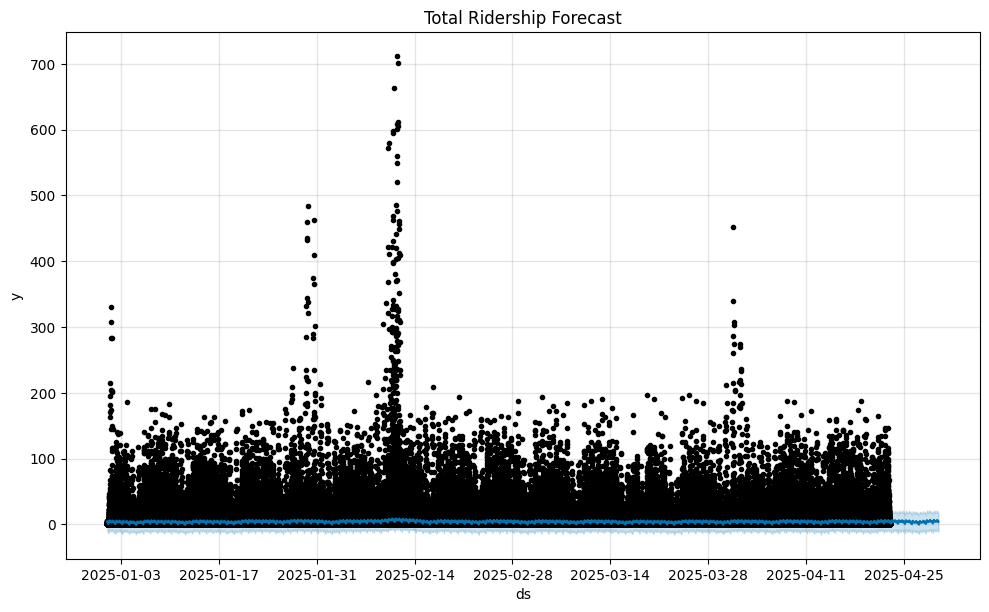

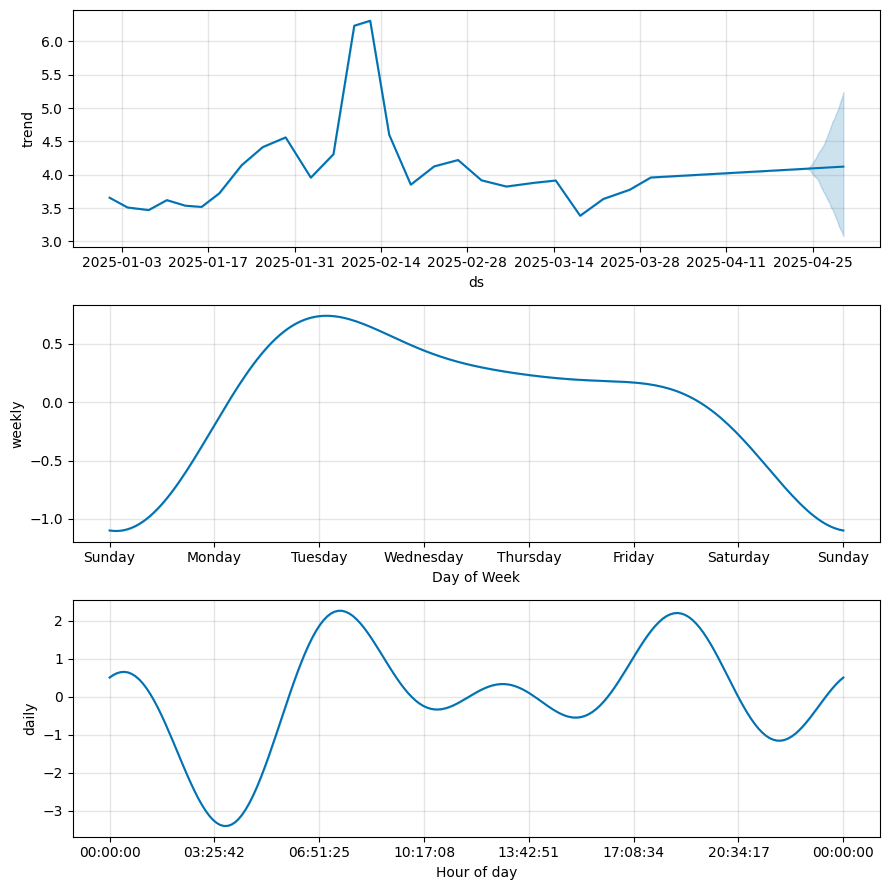

In [13]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title("Total Ridership Forecast")
plt.show()

# Plot forecast components (trend, weekly pattern, etc.)
fig2 = model.plot_components(forecast)
plt.show()


# Export the Results
This saves the forecast into a new CSV file you can download and use elsewhere

In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_output.csv', index=False)


# Conclusion
In this project, we successfully built a Prophet time series forecasting model to predict future ridership patterns for the Komuter transportation system using historical data from komuter_processed.csv. The model required minimal preprocessing and was able to automatically detect and model complex trends, seasonalities, and hourly fluctuations in ridership.

By converting the date and hour columns into a proper timestamp and preparing the total_ridership as our target, we created a streamlined dataset compatible with Prophet’s format. The model then learned from historical trends to generate 7-day hourly forecasts, complete with uncertainty intervals to help quantify confidence in each prediction.

The resulting visualizations offer:

A clear overview of expected ridership changes,

Breakdown of trends and seasonal effects,

And a practical basis for dynamic scheduling, capacity planning, and anomaly detection.

This approach provides a powerful, explainable, and easily updatable tool for forecasting in a public transport context—laying a strong foundation for smarter transit management and data-driven decision-making.

